In [3]:
from cv2 import imread
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def load_mnist(path):
    def read_images(ipath):
        f = open(ipath, "rb")
        data = f.read()
        [h, w, c, mn] = np.frombuffer(data[:16][::-1], 'int32', 4)
        images = np.frombuffer(data[16:], 'ubyte', w*h*c).reshape((c,w,h))
        return (w,h,c,images)

    def read_labels(lpath):
        f = open(lpath, "rb")
        data = f.read()
        [c, mn] = np.frombuffer(data[:8][::-1], 'intc', 2)
        labels = np.frombuffer(data[8:], 'ubyte', c)
        return (c,labels)

    [test_c, test_labels] = read_labels(path+"/t10k-labels.idx1-ubyte")
    [w, h, test_c, test_images] = read_images(path+"/t10k-images.idx3-ubyte")

    [train_c, train_labels] = read_labels(path+"/train-labels.idx1-ubyte")
    [_,_, _, train_images] = read_images(path+"/train-images.idx3-ubyte")
    return test_c, train_c, w, h, test_labels, test_images, train_labels, train_images
    

In [5]:
(test_c, train_c, w, h, test_labels, test_images, train_labels, train_images) = load_mnist("mnist")

(<matplotlib.image.AxesImage at 0x1c4b0ac1a60>, 2)

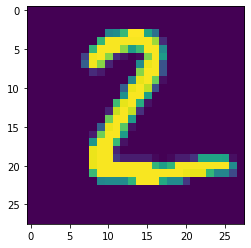

In [6]:
plt.imshow(test_images[1,:,:]), test_labels[1]

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
from tensorflow.keras.utils import to_categorical

In [28]:
model = Sequential([
    Conv2D(20, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(60, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(40, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]) # архитектура их примера

In [35]:
opt = SGD() # исключительно для тестов
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
X_train = (train_images/255).reshape((train_c, w, h, 1))
X_test = (test_images/255).reshape((test_c, w, h, 1))

In [38]:
X_train.dtype, X_test.dtype

(dtype('float64'), dtype('float64'))

In [39]:
import datetime
log_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir="logs/"+log_name, histogram_freq=1)
history = model.fit(
    X_train,
    to_categorical(train_labels),
    batch_size=128,
    epochs=2,
    validation_data=(X_test, to_categorical(test_labels)),
    callbacks=[tensorboard_callback]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - ETA: 0s - loss: 0.4044

InvalidArgumentError: You must feed a value for placeholder tensor 'conv2d_input' with dtype float and shape [?,28,28,1]
	 [[{{node conv2d_input}}]]

In [ ]:
%load_ext tensorboard